In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 350)

In [2]:
data = pd.read_csv("Fraud_Data.csv")
data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2/24/2015 22:55,4/18/2015 2:47,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,6/7/2015 20:39,6/8/2015 1:38,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,1/1/2015 18:52,1/1/2015 18:52,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,4/28/2015 21:13,5/4/2015 13:54,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,7/21/2015 7:09,9/9/2015 18:40,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,1/27/2015 3:03,3/29/2015 0:30,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,5/15/2015 17:43,5/26/2015 12:24,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,3/3/2015 23:07,5/20/2015 7:07,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,7/9/2015 20:06,9/7/2015 9:34,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [4]:
ip_address = pd.read_csv("IpAddress_to_Country.csv")
ip_address

,lower_bound_ip_address,upper_bound_ip_address,country
0,1.677722e+07,16777471,Australia
1,1.677747e+07,16777727,China
2,1.677773e+07,16778239,China
3,1.677824e+07,16779263,Australia
4,1.677926e+07,16781311,China
...,...,...,...
138841,3.758092e+09,3758093311,Hong Kong
138842,3.758093e+09,3758094335,India
138843,3.758095e+09,3758095871,China
138844,3.758096e+09,3758096127,Singapore


First Question

For each user, determine their country based on the IP address

In [10]:
country = [None]*data.shape[0]
for i in range(data.shape[0]):
    temp = ip_address[(data['ip_address'][i] >= ip_address['lower_bound_ip_address']) 
                     & (data['ip_address'][i] <= ip_address['upper_bound_ip_address'])]['country'].values
    if (len(temp) == 1):
        country[i] = temp[0]
data['country'] = country
data  

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2/24/2015 22:55,4/18/2015 2:47,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,6/7/2015 20:39,6/8/2015 1:38,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,1/1/2015 18:52,1/1/2015 18:52,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,4/28/2015 21:13,5/4/2015 13:54,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,None
4,221365,7/21/2015 7:09,9/9/2015 18:40,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States
...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,1/27/2015 3:03,3/29/2015 0:30,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,United States
151108,274471,5/15/2015 17:43,5/26/2015 12:24,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,Netherlands
151109,368416,3/3/2015 23:07,5/20/2015 7:07,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,Japan
151110,207709,7/9/2015 20:06,9/7/2015 9:34,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,United States


In [11]:
data.groupby('country').size().nlargest(10)

country
United States        58049
China                12038
Japan                 7306
United Kingdom        4490
Korea Republic of     4162
Germany               3646
France                3161
Canada                2975
Brazil                2961
Italy                 1944
dtype: int64

Second Question 

Build a model to predict whether an activity is fraudulent or not. Explain how different assumptions about the cost of false positives vs false negatives would impact the model

In [13]:
from datetime import datetime
data["signup_time"]   = pd.to_datetime(data["signup_time"])
data["purchase_time"] = pd.to_datetime(data["purchase_time"])
#time difference
data['purchase_signup_diff'] =  (data["purchase_time"]-data["signup_time"]).dt.total_seconds()

In [14]:
data['country'].replace([None], "Not_found", inplace=True)

In [20]:
data['device_id_count'] = data.groupby('device_id')['user_id'].transform('count')
data['ip_address_count'] = data.groupby('ip_address')['user_id'].transform('count')

In [22]:
data2 = data.drop(['user_id', 'signup_time', 'purchase_time', 'device_id'],axis=1)
bottom_countries = data2.groupby('country').size().sort_values(ascending=False)[50:]
bottom_countries = bottom_countries.index

In [24]:
x = dict.fromkeys(bottom_countries,'Other')
data2['country'] = data2['country'].replace(x)
data2 = pd.get_dummies(data2, drop_first = True)

In [25]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data2, test_size = 0.34)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(n_estimators=100, max_features=3, oob_score=True)
rf.fit(train.drop('class', axis=1), train['class'])

RandomForestClassifier(max_features=3, oob_score=True)

In [27]:
print("OOB accuracy is", rf.oob_score_, "\n", "OOB Confusion Matrix", "\n",
pd.DataFrame(confusion_matrix(train['class'], rf.oob_decision_function_[:,1].round(), labels=[0, 1]))
)

OOB accuracy is 0.9554510543150211 
 OOB Confusion Matrix 
        0     1
0  90247   121
1   4322  5043


In [28]:
print(
"Test accuracy is", rf.score(test.drop('class', axis=1),test['class']), "\n", 
"Test Set Confusion Matrix", "\n",pd.DataFrame(confusion_matrix(test['class'], rf.predict(test.drop('class', axis=1)), labels=[0, 1])))

Test accuracy is 0.9571225598006968 
 Test Set Confusion Matrix 
        0     1
0  46568    25
1   2178  2608


In [29]:
#We can double check that with a 0.5 cut-off we get the same results shown by rf output(since random forest internally uses 0.5)
#Predictions as probabilities
pred_prob=rf.predict_proba(test.drop('class', axis=1))[:,1]
#Predictions as actual classes
pred = rf.predict(test.drop('class', axis=1))
  
#Use 0.5 cutoff for probabilities. I.e. if larger > 0.5, predict 1, else predict 0. A short cut for this is using round function, which does exactly the same. If > 0.5, rounds to 1, else rounds to 0. Check if they are the same:
print(np.array_equal(pred_prob.round(), pred))

True


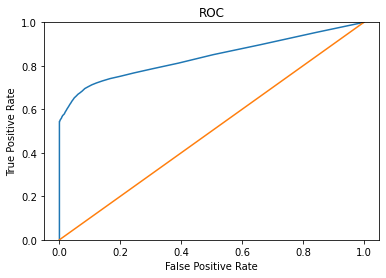

In [30]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
#Let's get false positive rate and true positive rate and plot them in the ROC
fpr, tpr, thresholds = roc_curve(test['class'],pred_prob)
#plot
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylim([0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

Based on the ROC, if we care about minimizing false positive, we would choose a cut-off that would give us true positive rate near 0.6 and false positive rate basically zero (this was similar to the default random forest output). However, if we care about maximizing true positive rate, we will have to significantly decrease the cut-off. This way we will classify more events as “1”: some will be true ones (so true positive goes up) and many, unfortunately, will be false ones (so false positive will also go up).

If we want to be a bit more accurate, we can use the approach of maximizing true positive rate - false positive rate, this is the same as maximizing (1-class1_error) - class0_error as we saw in the unbalanced data section.